In [1]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout 
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [4]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [5]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [6]:
#look a first image in array
xtrain[10]#0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

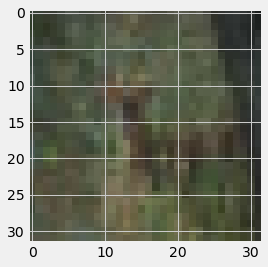

In [14]:
img0=plt.imshow(xtrain[10])

In [13]:
#get image label
lab1=ytrain[10]
print(lab1)

[4]


In [9]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [16]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [18]:
ytrain_one_hot[10]  #000100000 #000100000

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [19]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [20]:
xtrain[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              801000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)             

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=20,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 43s 1ms/step - loss: 1.8003 - accuracy: 0.3224 - val_loss: 1.6632 - val_accuracy: 0.3984


In [19]:
model.evaluate(xtest,ytest_one_hot)

10000/10000 [==============================] - 4s 379us/step


[1.6491641788482665, 0.4032999873161316]

In [20]:
cat=plt.imread('index.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'index.jpg'

In [ ]:
img=plt.imshow(cat)

In [25]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [27]:
resize=transform.resize(cat,(32,32,3))

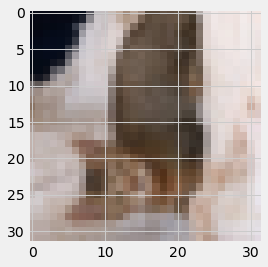

In [28]:
img=plt.imshow(resize)

In [30]:
prediction=model.predict(np.array([resize]))
print(prediction)

[[3.7792982e-03 1.2056086e-04 1.2090514e-01 4.0019345e-01 3.3829588e-02
  4.1073573e-01 7.7523165e-03 2.1789219e-02 7.2553521e-04 1.6915071e-04]]


In [31]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[5, 3, 2, 4, 7, 6, 0, 8, 9, 1]


In [32]:
 for i in range(5):
        print(classification[list_index[i]])

dog
cat
bird
deer
horse


In [ ]:
!pip install keras